In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_excel("51000_Decom.xlsx")

In [3]:
df

,Date,WVHT,Predicted
0,2016-01-01 00:00:00,3.17,0.000000
1,2016-01-01 01:00:00,3.12,0.000000
2,2016-01-01 02:00:00,3.21,0.000000
3,2016-01-01 03:00:00,2.80,0.000000
4,2016-01-01 04:00:00,3.05,0.000000
...,...,...,...
52603,2021-12-31 19:00:00,3.02,2.926017
52604,2021-12-31 20:00:00,2.96,2.939710
52605,2021-12-31 21:00:00,2.92,2.941266
52606,2021-12-31 22:00:00,2.89,2.954570


In [4]:
df.set_index('Date', inplace=True)
df.index=pd.to_datetime(df.index)
df.dropna(inplace=True)


<AxesSubplot:xlabel='Date'>

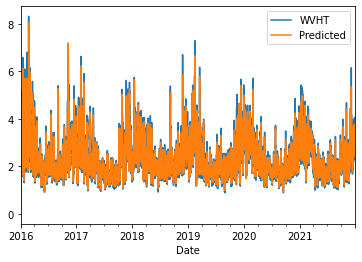

In [5]:
df.plot()

In [6]:
from statsmodels.tsa.filters.hp_filter import hpfilter


In [25]:
cycle, trend = hpfilter(df['WVHT'], 14400) 

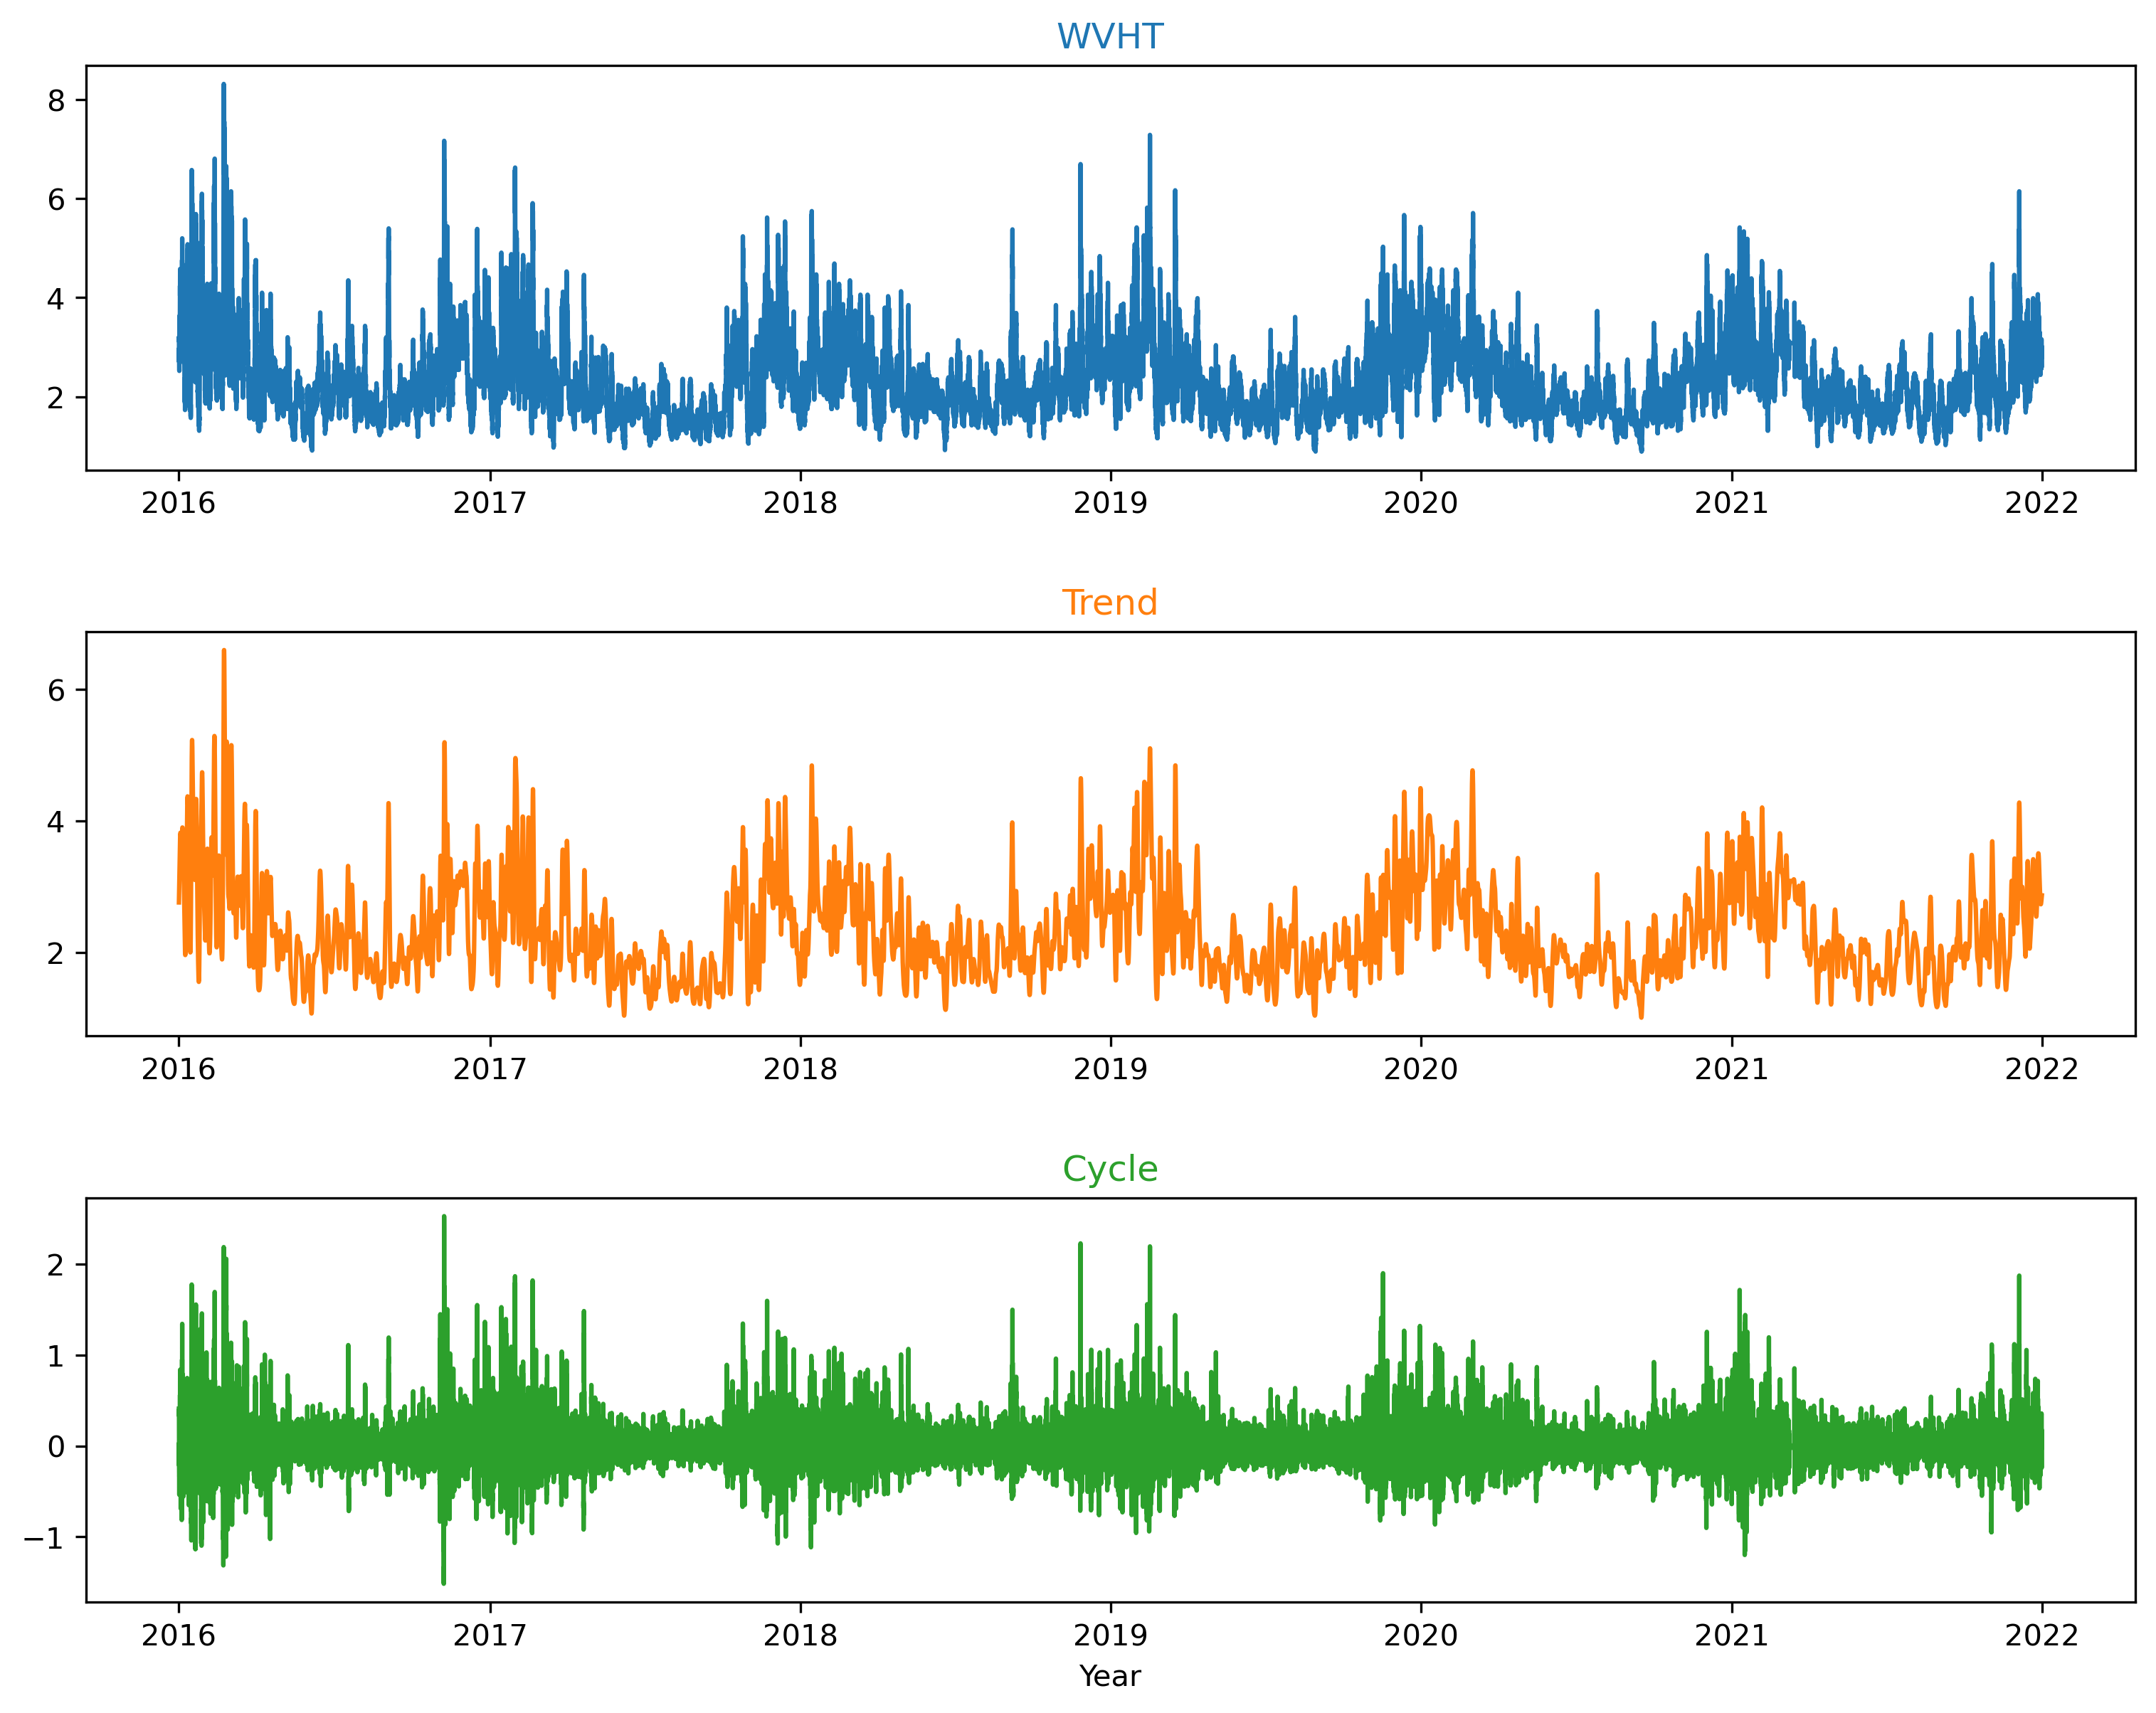

In [26]:
plt.rcParams['figure.figsize'] = [12, 9]
fig, ax = plt.subplots(3,1, figsize=(12,9), dpi=300)
ax[0].plot(df['WVHT'], color='C0')
ax[0].set_title('WVHT', color='C0')
ax[1].plot(trend, color="C1")
ax[1].set_title('Trend', color='C1')
ax[2].plot(cycle, color='C2')
ax[2].set_title('Cycle', color='C2')
plt.xlabel('Year')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [16]:
dict={'cycle':cycle,'trend':trend}

In [17]:
dict

{'cycle': Date
 2016-01-01 00:00:00    0.009073
 2016-01-01 01:00:00    0.020538
 2016-01-01 02:00:00    0.171821
 2016-01-01 03:00:00   -0.177670
 2016-01-01 04:00:00    0.128038
                          ...   
 2021-12-31 19:00:00    0.183586
 2021-12-31 20:00:00    0.098021
 2021-12-31 21:00:00    0.032990
 2021-12-31 22:00:00   -0.021387
 2021-12-31 23:00:00   -0.005651
 Name: WVHT_cycle, Length: 52608, dtype: float64,
 'trend': Date
 2016-01-01 00:00:00    3.160927
 2016-01-01 01:00:00    3.099462
 2016-01-01 02:00:00    3.038179
 2016-01-01 03:00:00    2.977670
 2016-01-01 04:00:00    2.921962
                          ...   
 2021-12-31 19:00:00    2.836414
 2021-12-31 20:00:00    2.861979
 2021-12-31 21:00:00    2.887010
 2021-12-31 22:00:00    2.911387
 2021-12-31 23:00:00    2.935651
 Name: WVHT_trend, Length: 52608, dtype: float64}

In [18]:
seas=pd.DataFrame(dict)

In [19]:
seas

,cycle,trend
Date,,
2016-01-01 00:00:00,0.009073,3.160927
2016-01-01 01:00:00,0.020538,3.099462
2016-01-01 02:00:00,0.171821,3.038179
2016-01-01 03:00:00,-0.177670,2.977670
2016-01-01 04:00:00,0.128038,2.921962
...,...,...
2021-12-31 19:00:00,0.183586,2.836414
2021-12-31 20:00:00,0.098021,2.861979
2021-12-31 21:00:00,0.032990,2.887010


In [20]:
seas.to_excel("HP_decom1.xlsx")

In [ ]:
#seas.to_excel("Seasonal_items.xlsx")